# SIADS 696 Milstone 2 - Dataset Exploration  

The following section should be used in case this notebook is executed in a Google Colab environment. It can be skipped or altered when a different environment is used.  

## Google Colab Sepcific Section

**Google Colab specific setup**  
Create data folders in Google Collab.

In [1]:
!mkdir /content/siads696
!mkdir /content/siads696/data

mkdir: cannot create directory ‘/content/siads696’: File exists
mkdir: cannot create directory ‘/content/siads696/data’: File exists


### Download Datasets from Broad Institute  
Download the CSV files from the Broad Institute. The CSV files contain the following content:
* Image names with compounds
* Compounds with SMILES
* Compounds with concetration and MoA  

**Google Colab specific setup**  
Need to be change in different environments.

In [2]:
!curl --output /content/siads696/data/BBBC021_v1_image.csv https://data.broadinstitute.org/bbbc/BBBC021/BBBC021_v1_image.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 3872k  100 3872k    0     0  4290k      0 --:--:-- --:--:-- --:--:-- 4293k


In [3]:
!curl --output /content/siads696/data/BBBC021_v1_compound.csv https://data.broadinstitute.org/bbbc/BBBC021/BBBC021_v1_compound.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  8179  100  8179    0     0  19726      0 --:--:-- --:--:-- --:--:-- 19756


In [4]:
!curl --output /content/siads696/data/BBBC021_v1_moa.csv https://data.broadinstitute.org/bbbc/BBBC021/BBBC021_v1_moa.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  4404  100  4404    0     0  12517      0 --:--:-- --:--:-- --:--:-- 12547


Install RDKit via pip for structure depction.  
**Google Colab specific setup**

In [5]:
!pip install rdkit

Import libraries used in this notebook.

## BBBC021 Data Exploration  

In addition to the usual imports like *Pandas* and *matplotlib* we also import RDKit, a widely used cheminformatics toolkit, for viusalization of chemical structures in the dataset.

In [1]:
import os

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from rdkit import Chem
from rdkit.Chem import Draw

### Load Datasets  
Load each dataset into a Pandas dataframe for further analysis.

In [2]:
# Google Colab specific data location
# data_dir = '/content/siads696/data'

# Data location used in Great Lakes environment
data_dir = '~/siads696/data'

In [3]:
df_image = pd.read_csv(os.path.join(data_dir, 'BBBC021_v1_image.csv'))
df_image.head()

,TableNumber,ImageNumber,Image_FileName_DAPI,Image_PathName_DAPI,Image_FileName_Tubulin,Image_PathName_Tubulin,Image_FileName_Actin,Image_PathName_Actin,Image_Metadata_Plate_DAPI,Image_Metadata_Well_DAPI,Replicate,Image_Metadata_Compound,Image_Metadata_Concentration
0,4,233,G10_s1_w1BEDC2073-A983-4B98-95E9-84466707A25D.tif,/scratch/siads696s24_class_root/siads696s24_cl...,G10_s1_w2DCEC82F3-05F7-4F2F-B779-C5DF9698141E.tif,/scratch/siads696s24_class_root/siads696s24_cl...,G10_s1_w43CD51CBC-2370-471F-BA01-EE250B14B3C8.tif,/scratch/siads696s24_class_root/siads696s24_cl...,Week4_27481,G10,1,5-fluorouracil,0.003
1,4,234,G10_s2_w11C3B9BCC-E48F-4C2F-9D31-8F46D8B5B972.tif,/scratch/siads696s24_class_root/siads696s24_cl...,G10_s2_w2570437EF-C8DC-4074-8D63-7FA3A7271FEE.tif,/scratch/siads696s24_class_root/siads696s24_cl...,G10_s2_w400B21F33-BDAB-4363-92C2-F4FB7545F08C.tif,/scratch/siads696s24_class_root/siads696s24_cl...,Week4_27481,G10,1,5-fluorouracil,0.003
2,4,235,G10_s3_w1F4FCE330-C71C-4CA3-9815-EAF9B9876EB5.tif,/scratch/siads696s24_class_root/siads696s24_cl...,G10_s3_w2194A9AC7-369B-4D84-99C0-DA809B0042B8.tif,/scratch/siads696s24_class_root/siads696s24_cl...,G10_s3_w4E0452054-9FC1-41AB-8C5B-D0ACD058991F.tif,/scratch/siads696s24_class_root/siads696s24_cl...,Week4_27481,G10,1,5-fluorouracil,0.003
3,4,236,G10_s4_w1747818B4-FFA7-40EE-B0A0-6A5974AF2644.tif,/scratch/siads696s24_class_root/siads696s24_cl...,G10_s4_w298D4652F-B5BF-49F2-BE51-8149DF83EAFD.tif,/scratch/siads696s24_class_root/siads696s24_cl...,G10_s4_w42648D36D-6B77-41CD-B520-6E4C533D9ABC.tif,/scratch/siads696s24_class_root/siads696s24_cl...,Week4_27481,G10,1,5-fluorouracil,0.003
4,4,473,G10_s1_w10034568D-CC12-43C3-93A9-DC3782099DD3.tif,/scratch/siads696s24_class_root/siads696s24_cl...,G10_s1_w2A29ED14B-952C-4BA1-89B9-4F92B6DADEB4.tif,/scratch/siads696s24_class_root/siads696s24_cl...,G10_s1_w4DAA2E9D1-F6E9-45FA-ADC0-D341B647A680.tif,/scratch/siads696s24_class_root/siads696s24_cl...,Week4_27521,G10,2,5-fluorouracil,0.003


In [4]:
df_compound = pd.read_csv(os.path.join(data_dir, 'BBBC021_v1_compound.csv'))
df_compound.head()

,compound,smiles
0,DMSO,NaN
1,leupeptin,CC(C)C[C@H](NC(=O)C)C(=O)N[C@@H](CC(C)C)C(=O)N...
2,taxol,CC(=O)O[C@H]1C(=O)[C@]2(C)[C@@H](O)C[C@H]3OC[C...
3,camptothecin,CC[C@@]1(O)C(=O)OCC2=C1C=C3N(Cc4cc5ccccc5nc34)...
4,Cdk1 inhibitor III,CCOC(=O)c1cnc2oc3ccc(O)cc3c2c1c4ccccc4


In [5]:
df_moa = pd.read_csv(os.path.join(data_dir, 'BBBC021_v1_moa.csv'))
df_moa.head()

,compound,concentration,moa
0,PP-2,3.0,Epithelial
1,emetine,0.3,Protein synthesis
2,AZ258,1.0,Aurora kinase inhibitors
3,cytochalasin B,10.0,Actin disruptors
4,ALLN,3.0,Protein degradation


### Explore Image Dataset

In [6]:
df_image.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13200 entries, 0 to 13199
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   TableNumber                   13200 non-null  int64  
 1   ImageNumber                   13200 non-null  int64  
 2   Image_FileName_DAPI           13200 non-null  object 
 3   Image_PathName_DAPI           13200 non-null  object 
 4   Image_FileName_Tubulin        13200 non-null  object 
 5   Image_PathName_Tubulin        13200 non-null  object 
 6   Image_FileName_Actin          13200 non-null  object 
 7   Image_PathName_Actin          13200 non-null  object 
 8   Image_Metadata_Plate_DAPI     13200 non-null  object 
 9   Image_Metadata_Well_DAPI      13200 non-null  object 
 10  Replicate                     13200 non-null  int64  
 11  Image_Metadata_Compound       13200 non-null  object 
 12  Image_Metadata_Concentration  13200 non-null  float64
dtypes

In [7]:
unique_img_compounds =  df_image['Image_Metadata_Compound'].unique()
print(f"No. of unique compounds:{unique_img_compounds.size}")
print("List of unique compounds:")
print('\n'.join(sorted(unique_img_compounds.tolist())))

No. of unique compounds:113
List of unique compounds:
3,3'-diaminobenzidine
5-fluorouracil
AG-1478
ALLN
AZ-A
AZ-B
AZ-C
AZ-H
AZ-I
AZ-J
AZ-K
AZ-L
AZ-M
AZ-N
AZ-O
AZ-U
AZ138
AZ235
AZ258
AZ701
AZ841
Cdk1 inhibitor III
Cdk1/2 inhibitor (NU6102)
DMSO
H-7
ICI-182,780
LY-294002
MG-132
PD-150606
PD-169316
PD-98059
PP-2
SB-202190
SB-203580
SP-600125
TKK
UNKNOWN
UO-126
Y-27632
acyclovir
aloisine A
alsterpaullone
anisomycin
aphidicolin
arabinofuranosylcytosine
atropine
bleomycin
bohemine
brefeldin A
bryostatin
calpain inhibitor 2 (ALLM)
calpeptin
camptothecin
carboplatin
caspase inhibitor 1 (ZVAD)
cathepsin inhibitor I
chlorambucil
chloramphenicol
cisplatin
colchicine
cyclohexamide
cyclophosphamide
cytochalasin B
cytochalasin D
demecolcine
deoxymannojirimycin
deoxynojirimycin
docetaxel
doxorubicin
emetine
epothilone B
etoposide
filipin
floxuridine
forskolin
genistein
herbimycin A
hydroxyurea
indirubin monoxime
jasplakinolide
lactacystin
latrunculin B
leupeptin
methotrexate
methoxylamine
mevinolin/l

### Explore Compound Dataset

In [8]:
df_compound.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113 entries, 0 to 112
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   compound  113 non-null    object
 1   smiles    98 non-null     object
dtypes: object(2)
memory usage: 1.9+ KB


In [9]:
compounds_wo_smiles = df_compound[df_compound['smiles'].isnull()]
print(f"No. of compunds w/o SMILES: {compounds_wo_smiles.shape[0]}")
print('Compounds w/o SMILES:')
print('\n'.join(compounds_wo_smiles['compound'].to_list()))

No. of compunds w/o SMILES: 15
Compounds w/o SMILES:
DMSO
AZ-O
AZ-U
TKK
AZ-H
AZ-A
UNKNOWN
AZ-B
AZ-I
AZ-N
AZ-L
AZ-M
AZ-C
AZ-J
AZ-K


In [10]:
compounds_w_smiles = df_compound[~df_compound['smiles'].isnull()].copy()
print(f"No. of compunds w SMILES: {compounds_w_smiles.shape[0]}")
print('Compounds w SMILES:')
print('\n'.join(sorted(compounds_w_smiles['compound'].to_list())))

No. of compunds w SMILES: 98
Compounds w SMILES:
3,3'-diaminobenzidine
5-fluorouracil
AG-1478
ALLN
AZ138
AZ235
AZ258
AZ701
AZ841
Cdk1 inhibitor III
Cdk1/2 inhibitor (NU6102)
H-7
ICI-182,780
LY-294002
MG-132
PD-150606
PD-169316
PD-98059
PP-2
SB-202190
SB-203580
SP-600125
UO-126
Y-27632
acyclovir
aloisine A
alsterpaullone
anisomycin
aphidicolin
arabinofuranosylcytosine
atropine
bleomycin
bohemine
brefeldin A
bryostatin
calpain inhibitor 2 (ALLM)
calpeptin
camptothecin
carboplatin
caspase inhibitor 1 (ZVAD)
cathepsin inhibitor I
chlorambucil
chloramphenicol
cisplatin
colchicine
cyclohexamide
cyclophosphamide
cytochalasin B
cytochalasin D
demecolcine
deoxymannojirimycin
deoxynojirimycin
docetaxel
doxorubicin
emetine
epothilone B
etoposide
filipin
floxuridine
forskolin
genistein
herbimycin A
hydroxyurea
indirubin monoxime
jasplakinolide
lactacystin
latrunculin B
leupeptin
methotrexate
methoxylamine
mevinolin/lovastatin
mitomycin C
mitoxantrone
monastrol
neomycin
nocodazole
nystatin
okadaic 

#### Depict Compounds  
Depict a subset of 8 random comounds having a valid SMILES.

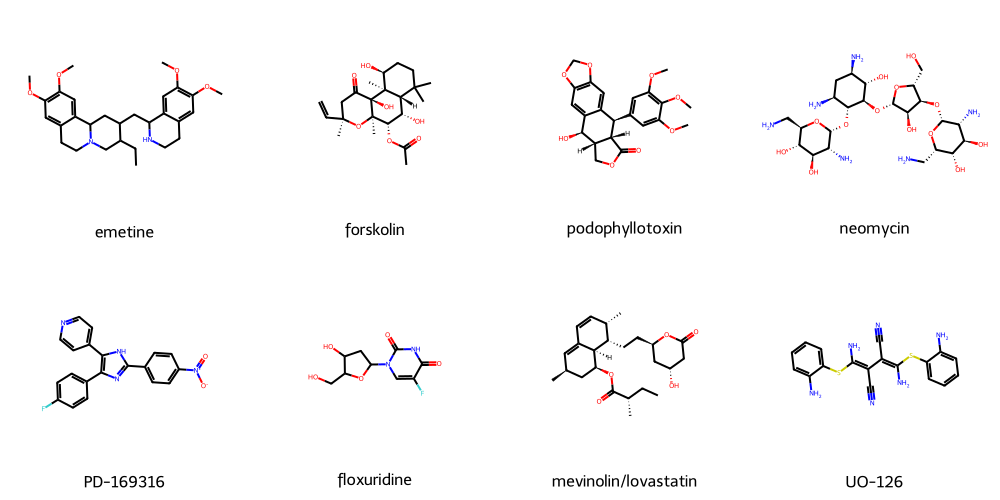

In [11]:
# add an RDKit molecule column to a dataframe
def add_molecule(smi):
  if smi is None:
    return None
  return Chem.MolFromSmiles(smi)

# add the name from another column in the dataframe
# to the RDKit molecule
def add_name_to_mol(row):
  if row['molecule'] is None:
    return None
  row['molecule'].SetProp('_Name', row['compound'])
  return row['molecule']

compounds_w_smiles['molecule'] = compounds_w_smiles['smiles'].apply(add_molecule)
compounds_w_smiles['molecule'] = compounds_w_smiles.apply(add_name_to_mol, axis=1)

random_compounds = compounds_w_smiles.sample(8)['molecule'].to_list()
Draw.MolsToGridImage(random_compounds,molsPerRow=4,subImgSize=(250,250),legends=[x.GetProp("_Name") for x in random_compounds])

### Explore MoA Dataset

In [12]:
df_moa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104 entries, 0 to 103
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   compound       104 non-null    object 
 1   concentration  104 non-null    float64
 2   moa            104 non-null    object 
dtypes: float64(1), object(2)
memory usage: 2.6+ KB


In [13]:
unique_moa_compounds = df_moa['compound'].unique()
print(f"No. of unique compounds having MoA: {unique_moa_compounds.size}")
print("List of unique compounds having MoA:")
print('\n'.join(sorted(unique_moa_compounds.tolist())))

No. of unique compounds having MoA: 39
List of unique compounds having MoA:
ALLN
AZ-A
AZ-C
AZ-J
AZ-U
AZ138
AZ258
AZ841
DMSO
MG-132
PD-169316
PP-2
alsterpaullone
anisomycin
bryostatin
camptothecin
chlorambucil
cisplatin
colchicine
cyclohexamide
cytochalasin B
cytochalasin D
demecolcine
docetaxel
emetine
epothilone B
etoposide
floxuridine
lactacystin
latrunculin B
methotrexate
mevinolin/lovastatin
mitomycin C
mitoxantrone
nocodazole
proteasome inhibitor I
simvastatin
taxol
vincristine


In [14]:
unique_moa = df_moa['moa'].unique()
print(f"No. of unique MoA: {unique_moa.size}")
print(f"List of unique MoA:")
print('\n'.join(unique_moa))

No. of unique MoA: 13
List of unique MoA:
Epithelial
Protein synthesis
Aurora kinase inhibitors
Actin disruptors
Protein degradation
DNA replication
Eg5 inhibitors
Microtubule stabilizers
DNA damage
Kinase inhibitors
Microtubule destabilizers
Cholesterol-lowering
DMSO


In [15]:
(df_moa.groupby(['compound'])['concentration'].count()
  .to_frame()
  .reset_index()
  .rename(columns={'concentration': 'no. of concentrations'}))

,compound,no. of concentrations
0,ALLN,2
1,AZ-A,6
2,AZ-C,7
3,AZ-J,3
4,AZ-U,3
5,AZ138,5
6,AZ258,3
7,AZ841,3
8,DMSO,1
9,MG-132,2


In [16]:
df_moa = (df_moa.drop(columns=['concentration'])
          .drop_duplicates(ignore_index=True)
          .sort_values(by='compound')
          .reset_index(drop=True))
print(f"df_moa shape: {df_moa.shape}")
df_moa

df_moa shape: (39, 2)


,compound,moa
0,ALLN,Protein degradation
1,AZ-A,Aurora kinase inhibitors
2,AZ-C,Eg5 inhibitors
3,AZ-J,Epithelial
4,AZ-U,Epithelial
5,AZ138,Eg5 inhibitors
6,AZ258,Aurora kinase inhibitors
7,AZ841,Aurora kinase inhibitors
8,DMSO,DMSO
9,MG-132,Protein degradation


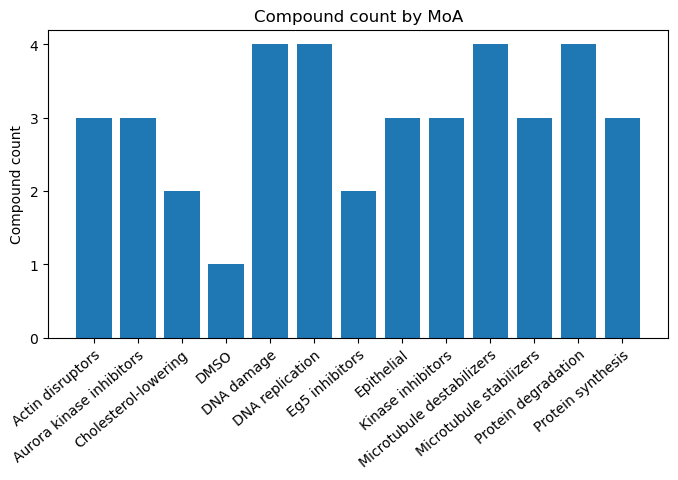

In [17]:
df_moa_compound_count = (df_moa.groupby(['moa'])['compound'].count()
                        .to_frame()
                        .reset_index())

y_ticks = range(0, df_moa_compound_count['compound'].max()+1, 1)

fig, ax = plt.subplots(figsize=(8,4))
ax.bar(df_moa_compound_count['moa'], df_moa_compound_count['compound'])
ax.set_ylabel('Compound count')
ax.set_title('Compound count by MoA')
ax.set_yticks(ticks=y_ticks)
plt.setp(ax.get_xticklabels(), rotation=40, ha='right', rotation_mode='anchor')
plt.show()

### Merge Image and MoA Datasets

In [18]:
df_image_moa = df_image.merge(df_moa, left_on='Image_Metadata_Compound', right_on='compound', how='left')
df_image_moa = df_image_moa.drop(columns=['compound'])
print(f"Merged dataframe shape: {df_image_moa.shape}")

Merged dataframe shape: (13200, 14)


In [19]:
df_image_moa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13200 entries, 0 to 13199
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   TableNumber                   13200 non-null  int64  
 1   ImageNumber                   13200 non-null  int64  
 2   Image_FileName_DAPI           13200 non-null  object 
 3   Image_PathName_DAPI           13200 non-null  object 
 4   Image_FileName_Tubulin        13200 non-null  object 
 5   Image_PathName_Tubulin        13200 non-null  object 
 6   Image_FileName_Actin          13200 non-null  object 
 7   Image_PathName_Actin          13200 non-null  object 
 8   Image_Metadata_Plate_DAPI     13200 non-null  object 
 9   Image_Metadata_Well_DAPI      13200 non-null  object 
 10  Replicate                     13200 non-null  int64  
 11  Image_Metadata_Compound       13200 non-null  object 
 12  Image_Metadata_Concentration  13200 non-null  float64
 13  m

Images w/o known MoA: 7040
Images w known MoA 6160


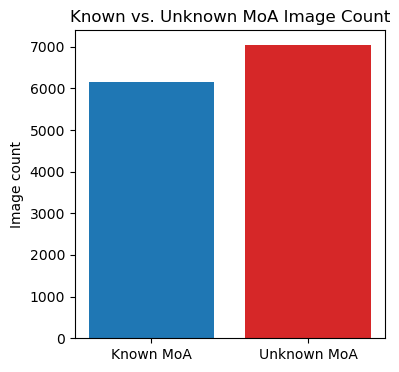

In [20]:
no_moa = df_image_moa[df_image_moa['moa'].isnull()].shape[0]
print(f"Images w/o known MoA: {no_moa}")
print(f"Images w known MoA {df_image_moa.shape[0]-no_moa}")

moa_cat = ['Known MoA', 'Unknown MoA']
moa_count = [df_image_moa.shape[0]-no_moa, no_moa]
bar_colors = ['tab:blue', 'tab:red']
moa_dist = {'Known MoA': df_image_moa.shape[0]-no_moa, 'Unknown MoA': no_moa}

fig, ax = plt.subplots(figsize=(4,4))
ax.bar(moa_cat, moa_count, color=bar_colors)
ax.set_ylabel('Image count')
ax.set_title('Known vs. Unknown MoA Image Count')
plt.show()

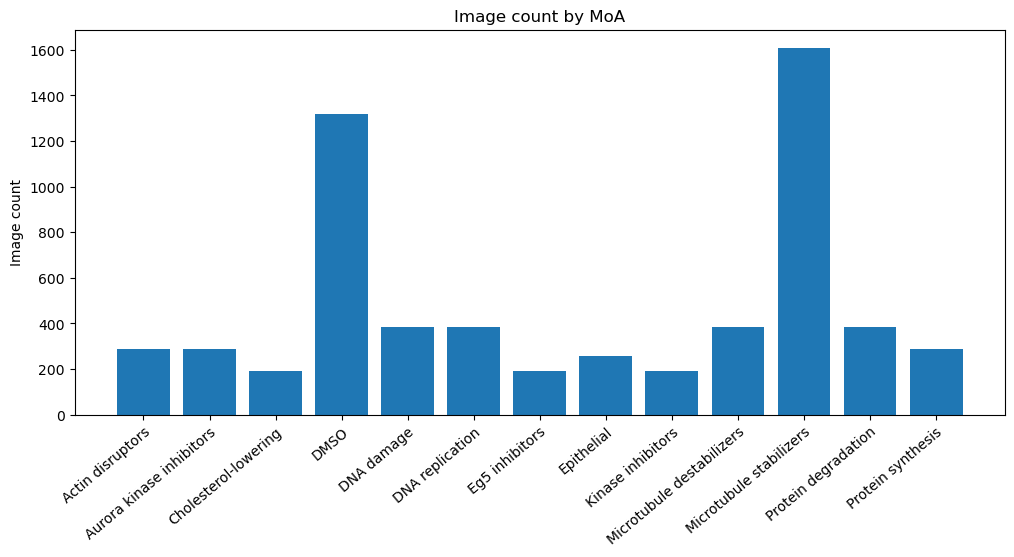

In [21]:
df_known_moa = df_image_moa[~df_image_moa['moa'].isnull()]
df_known_moa_count = (df_known_moa.groupby(['moa'])['ImageNumber'].count()
                      .to_frame()
                      .reset_index())

fig, ax = plt.subplots(figsize=(12,5))
ax.bar(df_known_moa_count['moa'], df_known_moa_count['ImageNumber'])
ax.set_ylabel('Image count')
ax.set_title('Image count by MoA')
plt.setp(ax.get_xticklabels(), rotation=40, ha='right', rotation_mode='anchor')
plt.show()

In [22]:
df_known_moa_count = df_known_moa_count.rename(columns={'moa': 'MoA', 'ImageNumber': 'Image Count'})
df_known_moa_count

,MoA,Image Count
0,Actin disruptors,288
1,Aurora kinase inhibitors,288
2,Cholesterol-lowering,192
3,DMSO,1320
4,DNA damage,384
5,DNA replication,384
6,Eg5 inhibitors,192
7,Epithelial,256
8,Kinase inhibitors,192
9,Microtubule destabilizers,384
